In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/amex-2019/val_fold_0_h2o transform.csv
/kaggle/input/amex-2019/LGBM_oof_withtrans.npy
/kaggle/input/amex-2019/test_preds_h2o.csv
/kaggle/input/amex-2019/test_preds_4.csv
/kaggle/input/amex-2019/val_fold_4_h2o transform.csv
/kaggle/input/amex-2019/campaign_data.csv
/kaggle/input/amex-2019/test_preds_0 GPU.csv
/kaggle/input/amex-2019/item_data.csv
/kaggle/input/amex-2019/train_fold_0_h2o transform.csv
/kaggle/input/amex-2019/train_0_full_enc_trx.csv
/kaggle/input/amex-2019/submission_withtrans.csv
/kaggle/input/amex-2019/test_fold_4_h2o transform.csv
/kaggle/input/amex-2019/val_0_full_enc_trx.csv
/kaggle/input/amex-2019/customer_transaction_data.csv
/kaggle/input/amex-2019/valid_preds_1.csv
/kaggle/input/amex-2019/LGBM_oof_tfidf.npy
/kaggle/input/amex-2019/val_fold_1_h2o transform.csv
/kaggle/input/amex-2019/train_fold_3_h2o transform.csv
/kaggle/input/amex-2019/test_fold_2_h2o transform.csv
/kaggle/input/amex-2019/test_0_full_enc_trx.csv
/kaggle/input/amex-2019/val_0_trx.c

In [2]:
pd.options.display.max_columns =200
pd.options.display.max_rows = 500

In [3]:
Path ='../input/amex-2019/'
train = pd.read_csv(Path+'train.csv')
print('train.shape:',train.shape)
campaign_data = pd.read_csv(Path+'campaign_data.csv')
print('campaign_data.shape:',campaign_data.shape)
coupon_item_mapping = pd.read_csv(Path+'coupon_item_mapping.csv')
print('coupon_item_mapping.shape:',coupon_item_mapping.shape)
customer_demographics = pd.read_csv(Path+'customer_demographics.csv')
print('customer_demographics.shape:',customer_demographics.shape)
item_data = pd.read_csv(Path+'item_data.csv')
print('item_data.shape:',item_data.shape)
subm = pd.read_csv(Path+'sample_submission.csv')
print('subm.shape:',subm.shape)
test = pd.read_csv(Path+'test.csv')
print('test.shape:',test.shape)             

train.shape: (78369, 5)
campaign_data.shape: (28, 4)
coupon_item_mapping.shape: (92663, 2)
customer_demographics.shape: (760, 7)
item_data.shape: (74066, 4)
subm.shape: (50226, 2)
test.shape: (50226, 4)


In [4]:
#drop id column and duplicates
print(train.shape)
train = train.drop('id',axis=1).drop_duplicates()
print('train shape after dropping duplicates:',train.shape)
#drop id column from test
test = test.drop('id',axis=1)

(78369, 5)
train shape after dropping duplicates: (78357, 4)


In [5]:
targetcol='redemption_status'
target = train[targetcol]

In [6]:
campaign_data

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [7]:
test_campaign  = test['campaign_id'].unique()
train_campaign  = train['campaign_id'].unique()

print(campaign_data[campaign_data['campaign_id'].isin(train_campaign)])
print(campaign_data[campaign_data['campaign_id'].isin(test_campaign)])

    campaign_id campaign_type start_date  end_date
10           13             X   19/05/13  05/07/13
11           11             Y   22/04/13  07/06/13
12           12             Y   22/04/13  24/05/13
13           10             Y   08/04/13  10/05/13
14            9             Y   11/03/13  12/04/13
15            8             X   16/02/13  05/04/13
16            7             Y   02/02/13  08/03/13
17            6             Y   28/01/13  01/03/13
18            3             Y   22/12/12  16/02/13
19            5             Y   12/01/13  15/02/13
20            4             Y   07/01/13  08/02/13
21            1             Y   12/12/12  18/01/13
22            2             Y   17/12/12  18/01/13
23           30             X   19/11/12  04/01/13
24           29             Y   08/10/12  30/11/12
25           28             Y   16/09/12  16/11/12
26           27             Y   25/08/12  27/10/12
27           26             X   12/08/12  21/09/12
   campaign_id campaign_type st

In [8]:
customer_transaction_data = pd.read_csv(Path+'customer_transaction_data.csv')
print('customer_transaction_data.shape:',customer_transaction_data.shape)

customer_transaction_data.shape: (1324566, 7)


Data Cleaning

In [9]:
#remove duplicates from customer trans
print(customer_transaction_data.shape)
customer_transaction_data = customer_transaction_data.drop_duplicates()
print(customer_transaction_data.shape)
customer_transaction_data.head()

(1324566, 7)
(1321650, 7)


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [10]:
print(item_data.shape)
item_data = item_data.drop_duplicates()
print(item_data.shape)
item_data.head()

(74066, 4)
(74066, 4)


,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


Explorations

In [11]:
# print(customer_transaction_data.describe())
# customer_transaction_data.loc[customer_transaction_data['coupon_discount'] > -1068.24,
#                               'coupon_discount'].min()

In [12]:
train.groupby(['campaign_id'])['coupon_id'].agg('nunique')
# train.groupby(['campaign_id','coupon_id']).size()

campaign_id
1      11
2      16
3      34
4      12
5      11
6       1
7       8
8     208
9      18
10     14
11     13
12     15
13    207
26    181
27     27
28     28
29     33
30    178
Name: coupon_id, dtype: int64

In [13]:
item_data['item_id'].nunique()

74066

In [14]:
print(train.info())
print(campaign_data.info())
print(coupon_item_mapping.info())
print(customer_demographics.info())
print(item_data.info())
print(customer_transaction_data.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78357 entries, 0 to 78368
Data columns (total 4 columns):
campaign_id          78357 non-null int64
coupon_id            78357 non-null int64
customer_id          78357 non-null int64
redemption_status    78357 non-null int64
dtypes: int64(4)
memory usage: 3.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
coupon_id    92663 non-null int64
item_id      92663 non-null int64
dtypes: int64(2)
memory usage: 1.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760

In [15]:
train.head()

,campaign_id,coupon_id,customer_id,redemption_status
0,13,27,1053,0
1,13,116,48,0
2,9,635,205,0
3,13,644,1050,0
4,8,1017,1489,0


In [16]:
test.head()

,campaign_id,coupon_id,customer_id
0,22,869,967
1,20,389,1566
2,22,981,510
3,25,1069,361
4,17,498,811


In [17]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [18]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [19]:
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [20]:
print(customer_transaction_data.shape)
customer_transaction_data.head()

(1321650, 7)


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [21]:
print(customer_transaction_data.groupby(['date','customer_id','item_id']).size().shape)

(1320387,)


In [22]:
print(coupon_item_mapping['item_id'].nunique())
customer_transaction_data['item_id'].nunique()

36289


74063

In [23]:
# print(customer_transaction_data.shape)
cols_to_dup_drop = ['date','customer_id','item_id']
grouped = customer_transaction_data.groupby(cols_to_dup_drop).size().reset_index()
grouped.columns = cols_to_dup_drop+['size']

In [24]:
duplicate_group = grouped[grouped['size']>1]
print(duplicate_group.shape)
mask = False
for i in range(duplicate_group.head(10).shape[0]):
    cur_mask = (customer_transaction_data['date']==duplicate_group.iloc[i]['date']) \
                & (customer_transaction_data['customer_id']==duplicate_group.iloc[i]['customer_id']) \
                & (customer_transaction_data['item_id']==duplicate_group.iloc[i]['item_id']) 
    mask = mask | cur_mask

print(customer_transaction_data.sort_values(cols_to_dup_drop)[mask].head(10))

#inference - there are multiple purchases on same day by same customer for same item id 
#around such 1000+ records
# can sum quantity, selling_price,other_discount and coupon_discount for these duplicates

# customer_transaction_data = customer_transaction_data.drop_duplicates(subset=cols_to_dup_drop)

(1250, 4)
            date  customer_id  item_id  quantity  selling_price  \
434   2012-01-04          814    22160         4          71.24   
443   2012-01-04          814    22160         2          35.62   
732   2012-01-05          979    32898         3          53.43   
735   2012-01-05          979    32898         4          71.24   
3229  2012-01-13          595    49009       995          77.65   
3230  2012-01-13          595    49009      1461         113.98   
3014  2012-01-13         1383    37313         1          63.76   
3053  2012-01-13         1383    37313         2         127.52   
8249  2012-01-25          799    28825         2         355.49   
8295  2012-01-25          799    28825         1         177.74   

      other_discount  coupon_discount  
434             0.00              0.0  
443             0.00              0.0  
732             0.00              0.0  
735             0.00              0.0  
3229           -0.36              0.0  
3230        

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Uniques and value counts

In [25]:
print(campaign_data['campaign_id'].unique())
print(train['campaign_id'].unique())
print(test['campaign_id'].unique())

[24 25 20 23 21 22 18 19 17 16 13 11 12 10  9  8  7  6  3  5  4  1  2 30
 29 28 27 26]
[13  9  8 11 29 30  2  5 12 26  3  4 10  7 28 27  6  1]
[22 20 25 17 18 21 23 19 16 24]


In [26]:
train['redemption_status'].value_counts()

0    77640
1      717
Name: redemption_status, dtype: int64

Merging Data

In [27]:
train_bef_merge = train.copy()
test_bef_merge = test.copy

In [28]:
def merge_multilevel_bycustomer_onitem(filter_date):
    aggs=['mean','sum','min','max','median','std']
    mode_fn = lambda x: pd.Series.mode(x)[0]
    
    # to filter out records for current validation set
    if filter_date is not None:
        mask = customer_transaction_data['date'] < filter_date
        data_merged = customer_transaction_data[mask]
        print('after valid date filter:',data_merged.shape)
    else:
        data_merged = customer_transaction_data.copy()
    
    groupbycols=['item_id']
    item_trans_agg = data_merged.groupby(groupbycols) .agg({
                                                                'date_isweekend':['count','mean'],
#                                                                'date_month':[mode_fn],
#                                                                'date_week':[mode_fn],
#                                                                'date_dayofweek':[mode_fn],
                                                               'quantity':aggs,
                                                               'other_discount':aggs,
                                                               'coupon_discount':aggs,
                                                               'selling_price':aggs
                                                                  }) \
                                                    
    cols_item_agg = ["_".join(x) for x in item_trans_agg.columns.ravel()]
#     print(len(cols_item_agg))
#     print(cols_item_agg)
    item_trans_agg.columns = cols_item_agg
    item_trans_agg= item_trans_agg.reset_index()

#     cols = ['size',
# #             'date_month_mode','date_week_mode','date_dayofweek_mode',
#                               'quantity_mean','quantity_sum','quantity_min','quantity_max','quantity_median','quantity_std',
#                               'other_discount_mean','other_discount_sum','other_discount_min',
#                                 'other_discount_max','other_discount_median','other_discount_std',
#                               'coupon_discount_mean','coupon_discount_sum','coupon_discount_min',
#                                 'coupon_discount_max','coupon_discount_median','coupon_discount_std',
#                               'selling_price_mean','selling_price_sum','selling_price_min',
#                                 'selling_price_max','selling_price_median','selling_price_std'
#                              ]
#     cols_item_agg = ['item_' + col for col in cols]
#     item_trans_agg.columns = groupbycols + cols_item_agg
    
    customer_transaction_data.groupby(['customer_id','item_id']).size().reset_index()
    data_merged = pd.merge(customer_transaction_data,item_trans_agg,on='item_id',how='left')
    agg_cust_dict = {}
    
    for col in cols_item_agg:
        agg_cust_dict[col] = aggs
    
    data_merged= data_merged.groupby(['customer_id']).agg(agg_cust_dict)
    cols_cust_agg = ["_".join(x) for x in data_merged.columns.ravel()]
    cols_cust_agg = ['cust_' + col for col in cols_cust_agg]
#     print(len(cols_cust_agg))
#     print(cols_cust_agg)
    data_merged.columns = cols_cust_agg
    data_merged= data_merged.reset_index()

    return data_merged

In [29]:
def labelencoding(data,enccols):
    for col in enccols:
        data[col],indexer = pd.factorize(data[col], sort=True )
        print('col:{0} indexer:{1}'.format(col,indexer))
        data.loc[data[col]==-1,col]=np.nan
    return data

def gendate_feats(data,datecols,format='mm/dd/yy'):
    for col in datecols:
        data[col] = pd.to_datetime(data[col],format=format)
        data[col+'_day'] = data[col].dt.day
        data[col+'_month'] = data[col].dt.month
        data[col+'_year'] = data[col].dt.year
        data[col+'_dayofweek'] = data[col].dt.dayofweek
        data[col+'_isweekend'] = (data[col+'_dayofweek']>=5).astype('int')
        data[col+'_week'] = data[col].dt.week
        
    return data

def merge_trans(data,filter_date):
    aggs=['mean','sum','min','max','median','std']
    mode_fn = lambda x: pd.Series.mode(x)[0]
    
    if filter_date is not None:
        mask = customer_transaction_data['date'] < filter_date
        cust_trans_cur = customer_transaction_data[mask]
    else:
        cust_trans_cur = customer_transaction_data
   

    cust_tran_to_item_agg = cust_trans_cur.groupby(['customer_id']).agg({'item_id':['count','nunique',mode_fn],
                                                           'date_isweekend':'mean',
                                                           'date_month':['mean',mode_fn],
                                                           'date_week':['mean',mode_fn],
                                                           'date_dayofweek':['mean',mode_fn],
                                                           'quantity':aggs,
                                                           'other_discount':aggs,
                                                           'coupon_discount':aggs,
                                                           'selling_price':aggs
                                                              }).reset_index()


    cust_tran_to_item_agg.columns = ['customer_id','trans_size','item_id_nunique','item_id_mode',
                             'date_isweekend_mean','date_month_mean','date_month_mode',
                              'date_week_mean','date_week_mode','date_dayofweek_mean','date_dayofweek_mode',
                              'quantity_mean','quantity_sum','quantity_min','quantity_max','quantity_median','quantity_std',
                              'other_discount_mean','other_discount_sum','other_discount_min','other_discount_max','other_discount_median','other_discount_std',
                              'coupon_discount_mean','coupon_discount_sum','coupon_discount_min','coupon_discount_max','coupon_discount_median','coupon_discount_std',
                              'selling_price_mean','selling_price_sum','selling_price_min','selling_price_max','selling_price_median','selling_price_std'
                             ]
    #data to coupon item on coupon_id key (left join)
    data = pd.merge(data,cust_tran_to_item_agg,on='customer_id',how='left')
    return data

def merge_customer_coupon(coupon_to_item,data_prior_merge,
                         filter_date):
    data_merged = pd.merge(data_prior_merge,coupon_to_item,on='coupon_id',how='left')
    data_merged = pd.merge(data_merged,customer_transaction_data,on=['customer_id','item_id'],how='inner')
 
    aggs=['mean','sum','min','max','median','std']
    mode_fn = lambda x: pd.Series.mode(x)[0]
    
    groupbycols = ['customer_id','coupon_id']
    
    # to filter out records for current validation set
    if filter_date is not None:
        mask = data_merged['date'] < filter_date
        print('before valid date filter:',data_merged.shape)
        data_merged = data_merged[mask]
        print('after valid date filter:',data_merged.shape)
    else:
        data_merged = data_merged
    
    #to filter records that do not belong to current campaign
#     print(data_merged.shape)
    data_merged = data_merged[data_merged['date'] < data_merged['start_date']]
#     print(data_merged.shape)
    
#     cust_coupon_trans_agg = cust_coupon_trans_agg.filter(lambda x: x['date'] < x['start_date']) 
    cust_coupon_trans_agg = data_merged.groupby(groupbycols) .agg({'item_id':['count','nunique',mode_fn],
                                                               'date_isweekend':'mean',
                                                               'date_month':['mean',mode_fn],
                                                               'date_week':['mean',mode_fn],
                                                               'date_dayofweek':['mean',mode_fn],
                                                               'quantity':aggs,
                                                               'other_discount':aggs,
                                                               'coupon_discount':aggs,
                                                               'selling_price':aggs
                                                                  }) \
                                                    .reset_index()

    cols = ['trans_size','item_id_nunique','item_id_mode',
                             'date_isweekend_mean','date_month_mean','date_month_mode',
                              'date_week_mean','date_week_mode','date_dayofweek_mean','date_dayofweek_mode',
                              'quantity_mean','quantity_sum','quantity_min','quantity_max','quantity_median','quantity_std',
                              'other_discount_mean','other_discount_sum','other_discount_min',
                                'other_discount_max','other_discount_median','other_discount_std',
                              'coupon_discount_mean','coupon_discount_sum','coupon_discount_min',
                                'coupon_discount_max','coupon_discount_median','coupon_discount_std',
                              'selling_price_mean','selling_price_sum','selling_price_min',
                                'selling_price_max','selling_price_median','selling_price_std'
                             ]
    cols_renamed = ['cust_coupon_' + col for col in cols]
#     print(cols_renamed)
#     print(cust_coupon_trans_agg.columns)
    cust_coupon_trans_agg.columns = groupbycols + cols_renamed
    #data to coupon item on coupon_id key (left join)
    data_merged = pd.merge(data_prior_merge,cust_coupon_trans_agg,on=groupbycols,how='left')

    return data_merged

def merge_trans_fold(data,coupon_to_item,filter_date):
    #merge customer transaction data
    print("Aggregating CustomerTrans")
    data_merged=merge_trans(data,filter_date)
    
    #merge customer transaction data and customer and coupon combination based aggregations
    print("Aggregating Customer Coupon with Trans")
    data_merged = merge_customer_coupon(coupon_to_item,data_merged,filter_date)
     
    return data_merged

def merge_amex_trans(tr,val,test,val_min_start_date,coupon_to_item):
    
    tr=merge_trans_fold(tr,coupon_to_item,val_min_start_date)
    val=merge_trans_fold(val,coupon_to_item,val_min_start_date)
    test=merge_trans_fold(test,coupon_to_item,None)
    
    print("Multilevel Customer with Trans")
    cust_multi_agg = merge_multilevel_bycustomer_onitem(val_min_start_date)
    val = pd.merge(val,cust_multi_agg,on='customer_id',how='left')
    tr = pd.merge(tr,cust_multi_agg,on='customer_id',how='left')
    
    cust_multi_agg = merge_multilevel_bycustomer_onitem(None)
    test = pd.merge(test,cust_multi_agg,on='customer_id',how='left')
    
    return tr,val,test
    
def merge_data(data):
    
    data_unmerged = data.copy()
    
    #merge data to campaign Data many to 1 on campaign_id key (left join)
    campaign_data_merge = pd.merge(data,campaign_data,on='campaign_id',how='left')
    #coupon to item_data (many to 1) on item_id key (left join) - call coupon item 
    coupon_to_item = pd.merge(coupon_item_mapping,item_data,on='item_id',how='left')
    
    mode_fn = lambda x: pd.Series.mode(x)[0]

    aggs= ['nunique',mode_fn]

    coupon_to_item_agg = coupon_to_item.groupby(['coupon_id']).agg({'item_id':'count',
                                                               'brand':aggs,
                                                               'brand_type':aggs,
                                                               'category':aggs}).reset_index()
    
    coupon_to_item_agg.columns = ['coupon_id','coupon_size','brand_nunique','brand_mode',
                                 'brand_type_nunique','brand_type_mode',
                                 'category_nunique','category_mode']
    
    #data to coupon item on coupon_id key (left join)
    data = pd.merge(campaign_data_merge,coupon_to_item_agg,on='coupon_id',how='left')
    #data to customer demographics on customer_id key (left join)
    data = pd.merge(data,customer_demographics,on='customer_id',how='left')
    
#     #merge customer transaction data
#     print("Aggregating CustomerTrans")
#     data=merge_trans(data)
    
#     #merge customer transaction data and customer and coupon combination based aggregations
#     print("Aggregating Customer Coupon with Trans")
#     data = merge_customer_coupon(campaign_data_merge,coupon_to_item,data)
        
    return data

In [30]:
#Label Encoding 
item_data = labelencoding(item_data,['brand_type', 'category'])
customer_demographics = labelencoding(customer_demographics,['marital_status', 'age_range',
                                                            'family_size', 'no_of_children'])
campaign_data = labelencoding(campaign_data,['campaign_type'])

col:brand_type indexer:Index(['Established', 'Local'], dtype='object')
col:category indexer:Index(['Alcohol', 'Bakery', 'Dairy, Juices & Snacks', 'Flowers & Plants',
       'Fuel', 'Garden', 'Grocery', 'Meat', 'Miscellaneous',
       'Natural Products', 'Packaged Meat', 'Pharmaceutical', 'Prepared Food',
       'Restauarant', 'Salads', 'Seafood', 'Skin & Hair Care', 'Travel',
       'Vegetables (cut)'],
      dtype='object')
col:marital_status indexer:Index(['Married', 'Single'], dtype='object')
col:age_range indexer:Index(['18-25', '26-35', '36-45', '46-55', '56-70', '70+'], dtype='object')
col:family_size indexer:Index(['1', '2', '3', '4', '5+'], dtype='object')
col:no_of_children indexer:Index(['1', '2', '3+'], dtype='object')
col:campaign_type indexer:Index(['X', 'Y'], dtype='object')


In [31]:
# item_data['category']= item_data['category'].astype('category')

In [32]:
# item_data['category']= item_data['category'].astype('float')

In [33]:
#Gen date feats
campaign_data = gendate_feats(campaign_data,['start_date','end_date'],format='%d/%m/%y')
customer_transaction_data = gendate_feats(customer_transaction_data,['date'],format='%Y-%m-%d')

In [34]:
test_campaign  = test['campaign_id'].unique()
train_campaign  = train['campaign_id'].unique()

cols =['campaign_id','start_date','end_date']

print(campaign_data[campaign_data['campaign_id'].isin(train_campaign)].sort_values('start_date')[cols])
print(campaign_data[campaign_data['campaign_id'].isin(test_campaign)].sort_values('start_date')[cols])

    campaign_id start_date   end_date
27           26 2012-08-12 2012-09-21
26           27 2012-08-25 2012-10-27
25           28 2012-09-16 2012-11-16
24           29 2012-10-08 2012-11-30
23           30 2012-11-19 2013-01-04
21            1 2012-12-12 2013-01-18
22            2 2012-12-17 2013-01-18
18            3 2012-12-22 2013-02-16
20            4 2013-01-07 2013-02-08
19            5 2013-01-12 2013-02-15
17            6 2013-01-28 2013-03-01
16            7 2013-02-02 2013-03-08
15            8 2013-02-16 2013-04-05
14            9 2013-03-11 2013-04-12
13           10 2013-04-08 2013-05-10
12           12 2013-04-22 2013-05-24
11           11 2013-04-22 2013-06-07
10           13 2013-05-19 2013-07-05
   campaign_id start_date   end_date
9           16 2013-07-15 2013-08-16
8           17 2013-07-29 2013-08-30
6           18 2013-08-10 2013-10-04
7           19 2013-08-26 2013-09-27
2           20 2013-09-07 2013-11-16
4           21 2013-09-16 2013-10-18
5           22 2013

In [35]:
#coupon to item_data (many to 1) on item_id key (left join) - call coupon item 
coupon_to_item = pd.merge(coupon_item_mapping,item_data,on='item_id',how='left')
# campaign_to_coupon_to_item = pd.merge(campaign_data,coupon_to_item,on='coupon_id',how='left')

In [36]:
train = merge_data(train)
print('Train Merge complete')
test = merge_data(test)
print('Test Merge complete')

Train Merge complete
Test Merge complete


In [37]:
# train_preproc = train.copy()
# test_preproc = test.copy()

In [38]:
train.dtypes

campaign_id                      int64
coupon_id                        int64
customer_id                      int64
redemption_status                int64
campaign_type                  float64
start_date              datetime64[ns]
end_date                datetime64[ns]
start_date_day                   int64
start_date_month                 int64
start_date_year                  int64
start_date_dayofweek             int64
start_date_isweekend             int64
start_date_week                  int64
end_date_day                     int64
end_date_month                   int64
end_date_year                    int64
end_date_dayofweek               int64
end_date_isweekend               int64
end_date_week                    int64
coupon_size                      int64
brand_nunique                    int64
brand_mode                       int64
brand_type_nunique               int64
brand_type_mode                float64
category_nunique                 int64
category_mode            

In [39]:
train.head()

,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,start_date_day,start_date_month,start_date_year,start_date_dayofweek,start_date_isweekend,start_date_week,end_date_day,end_date_month,end_date_year,end_date_dayofweek,end_date_isweekend,end_date_week,coupon_size,brand_nunique,brand_mode,brand_type_nunique,brand_type_mode,category_nunique,category_mode,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,13,27,1053,0,0.0,2013-05-19,2013-07-05,19,5,2013,6,1,20,5,7,2013,4,0,27,125,2,1105,1,0.0,1,6.0,3.0,NaN,0.0,0.0,NaN,5.0
1,13,116,48,0,0.0,2013-05-19,2013-07-05,19,5,2013,6,1,20,5,7,2013,4,0,27,3,1,56,1,1.0,1,6.0,2.0,0.0,0.0,1.0,NaN,3.0
2,9,635,205,0,1.0,2013-03-11,2013-04-12,11,3,2013,0,0,11,12,4,2013,4,0,15,67,1,560,1,0.0,1,11.0,3.0,0.0,0.0,1.0,NaN,7.0
3,13,644,1050,0,0.0,2013-05-19,2013-07-05,19,5,2013,6,1,20,5,7,2013,4,0,27,4,1,611,1,0.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN
4,8,1017,1489,0,0.0,2013-02-16,2013-04-05,16,2,2013,5,1,7,5,4,2013,4,0,14,32,1,1558,1,0.0,1,6.0,3.0,0.0,0.0,1.0,NaN,3.0


In [40]:
test.head()

,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,start_date_day,start_date_month,start_date_year,start_date_dayofweek,start_date_isweekend,start_date_week,end_date_day,end_date_month,end_date_year,end_date_dayofweek,end_date_isweekend,end_date_week,coupon_size,brand_nunique,brand_mode,brand_type_nunique,brand_type_mode,category_nunique,category_mode,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,22,869,967,0.0,2013-09-16,2013-10-18,16,9,2013,0,0,38,18,10,2013,4,0,42,72,1,1075,1,0.0,1,6.0,2.0,NaN,0.0,0.0,NaN,5.0
1,20,389,1566,1.0,2013-09-07,2013-11-16,7,9,2013,5,1,36,16,11,2013,5,1,46,33,3,57,1,0.0,1,11.0,1.0,NaN,0.0,1.0,NaN,9.0
2,22,981,510,0.0,2013-09-16,2013-10-18,16,9,2013,0,0,38,18,10,2013,4,0,42,19,1,1335,1,0.0,1,6.0,1.0,NaN,0.0,1.0,0.0,1.0
3,25,1069,361,1.0,2013-10-21,2013-11-22,21,10,2013,0,0,43,22,11,2013,4,0,47,74,1,1996,1,0.0,1,6.0,0.0,NaN,0.0,0.0,NaN,3.0
4,17,498,811,1.0,2013-07-29,2013-08-30,29,7,2013,0,0,31,30,8,2013,4,0,35,18,1,209,1,0.0,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
print(train['coupon_id'].nunique())
print(test['coupon_id'].nunique())

train_coupons = train['coupon_id'].unique()
test_coupons = test['coupon_id'].unique()

test_minus_train = list(set(test_coupons).difference(train_coupons))
train_minus_test = list(set(train_coupons).difference(test_coupons))
print('train minus test:',len(train_minus_test))
print('test_minus_train:',len(test_minus_train))

866
331
train minus test: 785
test_minus_train: 250


In [42]:
print(train['customer_id'].nunique())
print(test['customer_id'].nunique())

train_cust = train['customer_id'].unique()
test_cust = test['customer_id'].unique()

test_minus_train = list(set(test_cust).difference(train_cust))
train_minus_test = list(set(train_cust).difference(test_cust))
print('train minus test:',len(train_minus_test))
print('test_minus_train:',len(test_minus_train))

1428
1250
train minus test: 332
test_minus_train: 154


Generate TFIDF Features

In [43]:
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

In [44]:
def get_merged_coupondata(data):
    #coupon to item_data (many to 1) on item_id key (left join) - call coupon item 
    coupon_to_item = pd.merge(coupon_item_mapping,item_data,on='item_id',how='left')
    data_merged = pd.merge(data,coupon_to_item,on='coupon_id',how='left')
    return data_merged

def get_merged_trans(data):
    data_merged = pd.merge(data,customer_transaction_data,on=['customer_id'],how='inner')
    return data_merged
def get_merged_coupondata_trans(data,filter_date):
    #merge data to campaign Data many to 1 on campaign_id key (left join)
    campaign_data_merge = pd.merge(data,campaign_data,on='campaign_id',how='left')
    
    #coupon to item_data (many to 1) on item_id key (left join) - call coupon item 
    coupon_to_item = pd.merge(coupon_item_mapping,item_data,on='item_id',how='left')
         
    data_merged = pd.merge(campaign_data_merge,coupon_to_item,on='coupon_id',how='left')
    
    if filter_date is not None:
        mask = customer_transaction_data['date'] < filter_date
        cust_trans_cur = customer_transaction_data[mask]
    else:
        cust_trans_cur = customer_transaction_data
    #get grouping only where trans date < campaign start date 
    data_merged = pd.merge(data_merged,cust_trans_cur,on=['customer_id','item_id'],how='inner')
    data_merged = data_merged[data_merged['date'] < data_merged['start_date']]
    return data_merged
def generate_texts(data,raw_cols_to_gen,groupbycols,datecol=None):
    if (datecol is not None):
        sortcols = groupbycols+[datecol]
        data  = data.sort_values(sortcols)

    def get_concat_row_strings(x):
        x = [str(x) for x in x]
        return ' '.join(x)
    data_texts = data[groupbycols+raw_cols_to_gen].groupby(groupbycols).agg(get_concat_row_strings).reset_index()
    text_cols =[col+'_texts' for col in raw_cols_to_gen]

    data_texts.columns = groupbycols+text_cols
    return data_texts

In [45]:
def get_top_tf_idf_words(response, feature_names,top_n=10):
    sorted_data = np.sort(response.data)[:-(top_n+1):-1]
    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    return feature_names[response.indices[sorted_nzs]],sorted_data

def get_top_fulldata(responses,feature_names,top_n=10):
    topdata =[]
    topfeatsdata =[]
    topvaluesdata =[]
    for response in tqdm(responses):
        topfeats_topn_size =  np.full(top_n, np.nan) 
        topvalues_topn_size =  np.full(top_n, np.nan) 
        topfeats,topvalues = get_top_tf_idf_words(response,feature_names,top_n)
#         print('topfeats:',topfeats)
#         print('topvalues:',topvalues)
        topfeats_topn_size[:len(topfeats)] = topfeats[:]
        topvalues_topn_size[:len(topfeats)] = topvalues[:]
        topfeatsdata += [topfeats_topn_size]
        topvaluesdata += [topvalues_topn_size]
        
#         topdata += [(topfeats_topn_size,topvalues_topn_size)]
        
#     topdata = np.array(topdata)
    topfeatsdata = np.array(topfeatsdata)
    topvaluesdata = np.array(topvaluesdata)
#     print(topfeatsdata[0:5,:])
#     print(topvaluesdata[0:5,:])
    return topfeatsdata,topvaluesdata

#raw_cols_to_gen without texts keyword in col name
def gen_tfidf_topfeats(top_n,raw_cols_to_gen,data_texts):
    tf = TfidfVectorizer(tokenizer=lambda x: x.split(' '))

    for col in raw_cols_to_gen:
#         print(col)
        X_tfidf = tf.fit_transform(data_texts[col+'_texts'])
        feature_names = np.array(tf.get_feature_names())
        topfeatsdata,topvaluesdata = get_top_fulldata(X_tfidf,feature_names,top_n)

        #generate dataframe columns
        for i in range(topfeatsdata.shape[1]):
            namecol = 'tfidf_'+ col + '_name_top_' + str(i+1)
            valuecol = 'tfidf_'+ col + '_value_top_' + str(i+1)
            data_texts[namecol] = topfeatsdata[:,i]
            data_texts[valuecol] = topvaluesdata[:,i]
#             data_texts.loc[data_texts[valuecol]==np.nan,valuecol] = 0
            
        
    return data_texts

def gen_tfidf_fullfeats(raw_cols_to_gen,data_texts):
    tf = TfidfVectorizer(tokenizer=lambda x: x.split(' '))
    for col in raw_cols_to_gen:
#         print(col)
        X_tfidf = tf.fit_transform(data_texts[col+'_texts'])
#         X_tfidf = pd.DataFrame(X_tfidf.todense(), columns = ['tfidf_dense_'+col+str(x) for x in tf.vocabulary_.values()])
        X_tfidf = pd.DataFrame(X_tfidf.todense(), columns = ['tfidf_dense_'+col+"_"+x for x in tf.get_feature_names()])
#         print(X_tfidf.shape)
        data_texts = pd.concat([data_texts, X_tfidf], axis=1)
    return data_texts


In [46]:
#for tr data, merge to include all of its tr trans records before campaign date
#for val data, merge to include all tr trans records and no val trans records should be included
# (i.e) for val customer_transaction_data should be filtered for records with less than min val date
# the same filter can be used for tr also to optimize 
# for test data, include all tr records and val records (i.e) full train transactions
def gen_amex_tfidf_fold(data,top_n=10,val_min_start_date=None):
    merge_features = ['customer_id','coupon_id','campaign_id']
    data_merged = get_merged_coupondata_trans(data[merge_features],val_min_start_date)
    print('after data merge for tfidf shape:',data_merged.shape)
    #generate text for tfidf columns
    raw_cols_to_gen = ['brand','brand_type','category','item_id']
    groupbycols = ['customer_id','coupon_id']
    texts = generate_texts(data_merged,raw_cols_to_gen,groupbycols)
#     print('after tfidf gen:',texts.shape)
    
    #generate tfidf full features
    raw_cols_to_gen = ['brand_type','category']
    texts = gen_tfidf_fullfeats(raw_cols_to_gen,texts)
#     print('after full tfidf gen:',texts.shape)
    
    #generate tfidf top features
    raw_cols_to_gen = ['brand','item_id']
    texts = gen_tfidf_topfeats(top_n,raw_cols_to_gen,texts)
#     print('after top tfidf gen:',texts.shape)

    #fill na
    texts= texts.fillna(-1)
    return texts
    
def drop_missed_cols(data_to_drop,data_to_check,targetcol):
    cols_drop = [col for col in data_to_drop.columns if col!=targetcol]
    drop_m_check = list(set(cols_drop).difference(data_to_check.columns))
    print('cols to drop:',drop_m_check)
    data_to_drop = data_to_drop.drop(drop_m_check,axis=1)
    return data_to_drop

def merge_amex_tfidf(tr,val,test,val_min_start_date,targetcol,top_n=10):
    
    tr_texts=gen_amex_tfidf_fold(tr,top_n=top_n,val_min_start_date=val_min_start_date)
    val_texts=gen_amex_tfidf_fold(val,top_n=top_n,val_min_start_date=val_min_start_date)
    test_texts=gen_amex_tfidf_fold(test,top_n=top_n,val_min_start_date=None)
#     print('after gen tfidf  tr_texts:{0}: val_texts:{1} test_texts:{2}'.format(tr_texts.shape,
#                                                                    val_texts.shape,
#                                                                    test_texts.shape))
    
    #remove any categorical values which does not exist in test from train (e.g. tfidf_dense_category16 )
    tr_texts =drop_missed_cols(tr_texts,test_texts,targetcol)
    #remove any categorical values which does not exist in valid from train (e.g. tfidf_dense_category16 )
    tr_texts =drop_missed_cols(tr_texts,val_texts,targetcol)
    #remove any categorical values which does not exist in train from valid (e.g. tfidf_dense_category16 )
    val_texts =drop_missed_cols(val_texts,tr_texts,targetcol)
    #remove any categorical values which does not exist in train from test (e.g. tfidf_dense_category16 )
    test_texts =drop_missed_cols(test_texts,tr_texts,targetcol)
#     print('after drop cols  tr_texts:{0}: val_texts:{1} test_texts:{2}'.format(tr_texts.shape,
#                                                                    val_texts.shape,
#                                                                    test_texts.shape))
    
    #Merge tfidf with tr,val and test
    tr = pd.merge(tr,tr_texts, on=['customer_id','coupon_id'],how='left')
    val = pd.merge(val,val_texts, on=['customer_id','coupon_id'],how='left')
    test = pd.merge(test,test_texts, on=['customer_id','coupon_id'],how='left')
    
#     print('after texts merge  tr:{0}: val:{1} test:{2}'.format(tr.shape,val.shape,test.shape))
    
    #drop texts columns
    text_cols = [col for col in tr.columns if ('_texts') in col]
#     print(text_cols)
    tr = tr.drop(text_cols,axis=1)
    val = val.drop(text_cols,axis=1)
    test = test.drop(text_cols,axis=1)
    
    return tr,val,test


In [47]:
# merge_features = ['customer_id','coupon_id','campaign_id']
# train_temp = get_merged_coupondata_trans(train[merge_features])
# print(train_temp.shape)
# test_temp = get_merged_coupondata_trans(test[merge_features])
# print(test_temp.shape)

In [48]:
# temp_merged = pd.merge(train_temp,test_temp,on=['customer_id','item_id'],how='inner')
# print(temp_merged.shape)

In [49]:
# merge_features = ['customer_id','coupon_id','campaign_id']
# train_merged = get_merged_coupondata_trans(train[merge_features])
# print(train_merged.shape)
# test_merged = get_merged_coupondata_trans(test[merge_features])
# print(test_merged.shape)
# train_merged.head()

In [50]:
# %%time
# #generate text for tfidf columns
# raw_cols_to_gen = ['brand','brand_type','category','item_id']
# groupbycols = ['customer_id','coupon_id']
# train_texts = generate_texts(train_merged,raw_cols_to_gen,groupbycols)
# print('Train Text Generation Completed')
# print()
# test_texts = generate_texts(test_merged,raw_cols_to_gen,groupbycols)
# print('Test Text Generation Completed')
# train_texts.head()

In [51]:
# %%time
# #generate tfidf full features
# raw_cols_to_gen = ['brand_type','category']
# train_texts = gen_tfidf_fullfeats(raw_cols_to_gen,train_texts)
# test_texts = gen_tfidf_fullfeats(raw_cols_to_gen,test_texts)
# train_texts.head()

In [52]:
# #generate tfidf top features
# raw_cols_to_gen = ['brand','item_id']
# top_n = 10
# train_texts = gen_tfidf_topfeats(top_n,raw_cols_to_gen,train_texts)
# test_texts = gen_tfidf_topfeats(top_n,raw_cols_to_gen,test_texts)
# train_texts.head()

In [53]:
# test_texts.head()

In [54]:
targetcol='redemption_status'

In [55]:
# #remove any categorical values which does not exist in test from train (e.g. tfidf_dense_category16 )
# train_cols = [col for col in train_texts.columns if col!=targetcol]
# train_m_test = list(set(train_cols).difference(test_texts.columns))
# print(train_m_test)
# train_texts = train_texts.drop(train_m_test,axis=1)

In [56]:
# train_texts= train_texts.fillna(-1)
# test_texts= test_texts.fillna(-1)

In [57]:
# train  = train_preproc.copy()
# test  = test_preproc.copy()


In [58]:
# #Merge tfidf with train and test
# train = pd.merge(train,train_texts, on=['customer_id','coupon_id'],how='left')
# test = pd.merge(test,test_texts, on=['customer_id','coupon_id'],how='left')
# print(train.shape)
# print(test.shape)
# train.head()

In [59]:
# print(train[~train['tfidf_item_id_name_top_1'].isnull()].shape)
# test[~test['tfidf_item_id_name_top_1'].isnull()].shape

In [60]:
# #remove any categorical values which does not exist in test from train (e.g. tfidf_dense_category16 )
# train_cols = [col for col in train.columns if col!=targetcol]
# train_m_test = list(set(train_cols).difference(test.columns))
# test_m_train = list(set(test.columns).difference(train_cols))
# print(train_m_test)
# print(test_m_train)

In [61]:
# #remove texts columns
# text_cols = [col for col in train.columns if ('_texts') in col]
# print(text_cols)
# train = train.drop(text_cols,axis=1)
# test = test.drop(text_cols,axis=1)
# print(train.shape)
# print(test.shape)

By Customer Id TFIDF

In [62]:
# targetcol='redemption_status'

In [63]:
# #merge with coupon data
# print(customer_transaction_data.shape)
# #coupon to item_data (many to 1) on item_id key (left join) - call coupon item 
# # coupon_to_item = pd.merge(coupon_item_mapping,item_data,on='item_id',how='left')
# # data_merged = pd.merge(customer_transaction_data,coupon_to_item,on='item_id',how='left')
# data_merged = pd.merge(customer_transaction_data,item_data,on='item_id',how='left')
# print(data_merged.shape)

In [64]:
# #generate text for tfidf columns
# raw_cols_to_gen = ['brand','brand_type','category','item_id']
# groupbycols = ['customer_id']
# texts = generate_texts(data_merged,raw_cols_to_gen,groupbycols)
# texts.head(10)

In [65]:
# %%time
# #generate tfidf full features
# raw_cols_to_gen = ['brand_type','category']
# texts = gen_tfidf_fullfeats(raw_cols_to_gen,texts)
# texts.head()

In [66]:
# #generate tfidf top features
# raw_cols_to_gen = ['brand','item_id']
# top_n = 10
# texts = gen_tfidf_topfeats(top_n,raw_cols_to_gen,texts)
# texts.head()

In [67]:
# #Merge tfidf with train and test
# train = pd.merge(train,texts, on=['customer_id'],how='left')
# test = pd.merge(test,texts, on=['customer_id'],how='left')
# print(train.shape)
# print(test.shape)
# train.head()

In [68]:
# #remove texts columns
# text_cols = [col for col in train.columns if ('_texts') in col]
# print(text_cols)
# train = train.drop(text_cols,axis=1)
# test = test.drop(text_cols,axis=1)
# print(train.shape)
# print(test.shape)

Explorations

In [69]:
#customer coupon - no of records in customer trans

In [70]:
print(train.shape)
print('cust coupon uniques:',train.groupby(['customer_id','coupon_id']).size().shape)
print('cust campaign coupon uniques:',train.groupby(['campaign_id','customer_id','coupon_id']).size().shape)

(78357, 32)
cust coupon uniques: (77101,)
cust campaign coupon uniques: (78357,)


In [71]:
# groupfeats = ['campaign_id','customer_id','coupon_id']
# grouped = train.groupby(groupfeats).size().reset_index()
# grouped.columns = groupfeats+['size']
# duplicate_group = grouped[grouped['size']>1]
# print(duplicate_group)
# mask = False
# for i in range(duplicate_group.shape[0]):
#     cur_mask = (train['campaign_id']==duplicate_group.iloc[i]['campaign_id']) \
#                 & (train['customer_id']==duplicate_group.iloc[i]['customer_id']) \
#                 & (train['coupon_id']==duplicate_group.iloc[i]['coupon_id']) 
#     mask = mask | cur_mask

# feats = groupfeats+['redemption_status']
# print(train.sort_values(groupfeats).loc[mask,feats])

In [72]:
# groupfeats = ['campaign_id','customer_id','coupon_id']
# grouped = train.groupby(groupfeats).size().reset_index()
# grouped.columns = groupfeats+['size']
# duplicate_group = grouped[grouped['size']>1]
# print(duplicate_group)
# mask = False
# for i in range(duplicate_group.shape[0]):
#     cur_mask = (customer_transaction_data['customer_id']==duplicate_group.iloc[i]['customer_id']) 
#     mask = mask | cur_mask

# print(customer_transaction_data[mask].shape)

In [73]:
# groupfeats = ['campaign_id','customer_id','coupon_id']
# grouped = test.groupby(groupfeats).size().reset_index()
# grouped.columns = groupfeats+['size']
# duplicate_group = grouped[grouped['size']>1]
# print(duplicate_group)
# mask = False
# for i in range(duplicate_group.shape[0]):
#     cur_mask = (test['campaign_id']==duplicate_group.iloc[i]['campaign_id']) \
#                 & (test['customer_id']==duplicate_group.iloc[i]['customer_id']) \
#                 & (test['coupon_id']==duplicate_group.iloc[i]['coupon_id']) 
#     mask = mask | cur_mask

# feats = groupfeats+['id']
# print(test.sort_values(groupfeats).loc[mask,feats])

In [74]:
def gen_Feature_Interactions(data):
    # Add:coupon_discount_sum:cust_coupon_coupon_discount_min
    data['coupon_discount_sum_Int_add']=data['coupon_discount_sum'] + data['cust_coupon_coupon_discount_min']
    #Div:coupon_discount_sum:tfidf_item_id_value_top_1
    data['coupon_discount_sum_Int_div_1']=data['coupon_discount_sum'] / data['tfidf_item_id_value_top_1']
    #Add:coupon_discount_mean:cust_coupon_coupon_discount_min
    data['coupon_discount_mean_Int_add']=data['coupon_discount_mean'] + data['cust_coupon_coupon_discount_min']
    #Div:coupon_discount_mean:cust_coupon_coupon_discount_mean
    data['coupon_discount_mean_Int_div']=data['coupon_discount_mean'] / data['cust_coupon_coupon_discount_mean']
    #Div:coupon_discount_sum:tfidf_item_id_name_top_2
#     data['coupon_discount_sum_Int_div_2']=data['coupon_discount_sum'] / data['tfidf_item_id_name_top_2']
    #Div:coupon_discount_sum:cust_coupon_date_week_mode
    data['coupon_discount_sum_Int_div_3']=data['coupon_discount_sum'] / data['cust_coupon_date_week_mode']
    #Div:campaign_type:quantity_max
#     data['campaign_type_Int_div']=data['campaign_type'] / data['quantity_max']
    
    return data
    

In [75]:
# train = gen_Feature_Interactions(train)
# test = gen_Feature_Interactions(test)

Save Preprocessed Files

In [76]:
train.to_csv('train_preproc.csv')
test.to_csv('test_preproc.csv')

Model

In [77]:
from sklearn.metrics import log_loss
import lightgbm as lgb
import time
from sklearn.metrics import f1_score,precision_recall_curve,roc_curve
from sklearn.metrics import roc_auc_score, recall_score,precision_score

from sklearn.model_selection import StratifiedKFold

In [78]:

def lgb_predict(model,data):
    return model.predict(data, num_iteration=model.best_iteration)

def lgb_fit(train,val,target_train,target_val,param):
    trn_data = lgb.Dataset(train, label=target_train)#,, categorical_feature=categorical_feats)
    val_data = lgb.Dataset(val, label=target_val)#,, categorical_feature=categorical_feats)

    num_round = param['n_estimators']
    clf = lgb.train(param, trn_data, num_round, valid_sets = [val_data], verbose_eval=100, 
                    early_stopping_rounds = 200)

    return clf
def lgb_predict_full(model,data,param):
    return model.predict(data, num_iteration=param['n_estimators'])
def lgb_fit_full(train,target_train,param):
    trn_data = lgb.Dataset(train, label=target_train)#,, categorical_feature=categorical_feats)

    num_round = param['n_estimators']
    clf = lgb.train(param, trn_data, num_round)

    return clf


In [79]:
# def runmodel(train,test,target,param,cur_features,fit_function,predict_function):

#     feature_importance_df = pd.DataFrame()
#     feature_importance_df["Feature"] = cur_features
#     feature_importance_df["importance"] = 0    
    
#     oof = np.zeros(train.shape[0])
#     predictions = np.zeros(test.shape[0])
#     start = time.time()
#     valid_scores =[]
#     models =[]

#     folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4590)
#     indices = folds.split(train, target.values)
        
#     for fold_, (trn_idx, val_idx) in enumerate(indices):
#         print()
#         print("fold n°{}".format(fold_))

#         tr = train.iloc[trn_idx]
#         val = train.iloc[val_idx]
#         y_val = target.iloc[val_idx]
#         y_tr = target.iloc[trn_idx]
        
#         #save current train and validation
#         tr.to_csv('train_fold_'+str(fold_)+'.csv',index=False)
#         val.to_csv('val_fold_'+str(fold_)+'.csv',index=False)
#         y_tr.to_csv('train_target_fold_'+str(fold_)+'.csv',index=False)
#         y_val.to_csv('val_target_fold_'+str(fold_)+'.csv',index=False)
        
#         clf = fit_function(tr,val,y_tr,y_val,param)
#         print('Fit complete')
#         models += [clf]
        
#         val_preds = predict_function(clf,val)
#         oof[val_idx] = val_preds
#         print('Val Pred complete')

#         val_score = log_loss(y_val, val_preds)
#         print('Cur Val Log loss Score:',val_score)
#         val_score = roc_auc_score(y_val, val_preds)
#         print('Cur Val AUC Score:',val_score)
#         valid_scores+=[val_score]
# #         valid_scores+=[clf.best_score['valid_0'][param['metric']]]
        
#         predictions += predict_function(clf,test) / folds.n_splits
#         print('Test Pred complete')
        
#         if hasattr(clf, 'feature_importance'):
#             feature_importance_df["importance"] += clf.feature_importance() / folds.n_splits       

#     print('valid scores:',valid_scores)
#     print("CV AUC score: ",roc_auc_score(target, oof))
    
#     return models,predictions,oof,feature_importance_df

In [80]:
#Date Validation split
import datetime

def gen_fold_encs(train,test,target,valid_campaign_ids,train_campaign_ids,n_splits):

    tr_encs =list(range(n_splits))
    val_encs =list(range(n_splits))
    test_encs =list(range(n_splits))
    
    fold_feats =[]
        
    for fold_ in range(n_splits):
        
        print('******************* ')
        print('fold: ',fold_)
        print('valid_campaign_ids: ',valid_campaign_ids[fold_])
        print('******************* ')
        
        dates_valid_filter = (train['campaign_id'].isin(valid_campaign_ids[fold_]))
        dates_train_filter = (train['campaign_id'].isin(train_campaign_ids[fold_]))

        tr = train[dates_train_filter]
        y_tr = target[dates_train_filter]
        val = train[dates_valid_filter]
        y_val = target[dates_valid_filter]
        val_index = val.index
        
        print(y_tr.unique())
        print(y_val.unique())
        
        val_min_start_date = val['start_date'].min()
        test_cur= test.copy()
        
        #merge transactions and tfidf features at fold level
        tr,val,test_cur= merge_amex_trans(tr,val,test_cur,val_min_start_date,coupon_to_item)
        print('1st merge tr:{0} val:{1} test:{2}'.format(tr.shape,val.shape,test_cur.shape))
        tr,val,test_cur= merge_amex_tfidf(tr,val,test_cur,val_min_start_date,targetcol,top_n=10)
        print('2nd merge tr:{0} val:{1} test:{2}'.format(tr.shape,val.shape,test_cur.shape))
        
#         tr =gen_Feature_Interactions(tr)
#         val =gen_Feature_Interactions(val)
#         test_cur =gen_Feature_Interactions(test_cur)
        
        cur_features= getfeatures(tr)
        fold_feats += [cur_features]
        tr = tr[cur_features]; val = val[cur_features]; test_cur = test_cur[cur_features]
        #add target col to tr and val
        print(tr.index)
        print(y_tr.index)
        print(val.index)
        print(y_val.index)
        tr[targetcol]=y_tr.reset_index(drop=True); val[targetcol]= y_val.reset_index(drop=True)
        print(tr[targetcol].unique())
        print(val[targetcol].unique())
        
        tr_encs[fold_] = tr; val_encs[fold_]= val ; test_encs[fold_] = test_cur
        
    return tr_encs, val_encs, test_encs,fold_feats

#Date Validation split
import datetime

def gen_full_train_encs(train,test_enc,targetcol,target,coupon_to_item):

    #merge trans summary feats
    train_full_enc=merge_trans_fold(train,coupon_to_item,None)
    print("Multilevel Customer with Trans")
    cust_multi_agg = merge_multilevel_bycustomer_onitem(None)
    train_full_enc = pd.merge(train_full_enc,cust_multi_agg,on='customer_id',how='left')
    
    #merge tfidf 
    texts=gen_amex_tfidf_fold(train_full_enc,top_n=10,val_min_start_date=None)
    train_full_enc = pd.merge(train_full_enc,texts, on=['customer_id','coupon_id'],how='left')
    train_full_enc =drop_missed_cols(train_full_enc , test_enc, targetcol)
    text_cols = [col for col in train_full_enc.columns if ('_texts') in col]
    train_full_enc = train_full_enc.drop(text_cols,axis=1)

    #         train_full_enc =gen_Feature_Interactions(train_full_enc)

    cur_features= getfeatures(train_full_enc)
    train_full_enc = train_full_enc[cur_features]
    train_full_enc[targetcol]=target.reset_index(drop=True)

    return train_full_enc, cur_features


In [81]:
import datetime
#time series model dates
# valid_campaign_start_dates= []
# valid_campaign_end_dates= []

# valid_campaign_start_dates  += [datetime.datetime(2013,3,11)]
# valid_campaign_start_dates  += [datetime.datetime(2013,2,2)]
# valid_campaign_start_dates  += [datetime.datetime(2013,1,7)]
# valid_campaign_start_dates  += [datetime.datetime(2012,12,12)]

# valid_campaign_end_dates  += [datetime.datetime(2013,7,5)]
# valid_campaign_end_dates  += [datetime.datetime(2013,2,2)]
# valid_campaign_end_dates  += [datetime.datetime(2013,1,7)]
# valid_campaign_end_dates  += [datetime.datetime(2012,12,12)]


valid_campaign_ids =[]
train_campaign_ids =[]

# valid_campaign_ids +=             [[9,10,11,12,13]]
# valid_campaign_ids +=         [[7,8,9,10,11,12]]
# valid_campaign_ids +=   [[4,5,6,7,8,9,10,12]]
# valid_campaign_ids += [[1,2,3,4,5,6,7,8,9]]


# train_campaign_ids +=   [[26,27,28,29,30,1,2,3,4,5,6,7,8]]
# train_campaign_ids +=   [[26,27,28,29,30,1,2,3,4,5,6]]
# train_campaign_ids +=   [[26,27,28,29,30,1,2,3]]
# train_campaign_ids +=   [[26,27,28,29,30]]

valid_campaign_ids +=       [[11,13]]
valid_campaign_ids +=       [[10,12]]
valid_campaign_ids +=   [[9,8]]
valid_campaign_ids += [[6,7]]
valid_campaign_ids += [[4,5]]


train_campaign_ids +=   [[26,27,28,29,30,1,2,3,4,5,6,7,8,9,10,12]]
train_campaign_ids +=   [[26,27,28,29,30,1,2,3,4,5,6,7,8,9]]
train_campaign_ids +=   [[26,27,28,29,30,1,2,3,4,5,6,7]]
train_campaign_ids +=   [[26,27,28,29,30,1,2,3,4,5]]
train_campaign_ids +=   [[26,27,28,29,30,1,2,3]]

In [82]:
#Date Validation split
import datetime


def runtimeseries(tr_encs,val_encs,test_encs,params,n_splits,fold_feats,
                  fit_function,predict_function):
    n_splits = 5

    model_iterations =[]
    fold_importance_df = []
    
    oof = np.zeros(train.shape[0])
    predictions = np.zeros(test.shape[0])
    start = time.time()
    valid_scores =[]
    models =[]

        
    for fold_ in range(n_splits):
        
        print('******************* ')
        print('fold: ',fold_)
        print('valid_campaign_ids: ',valid_campaign_ids[fold_])
        print('******************* ')
        
        cur_features  = fold_feats[fold_].copy()
        
        tr =  tr_encs[fold_]; val = val_encs[fold_]; test_cur = test_encs[fold_]
        y_tr  = tr[targetcol]; y_val = val[targetcol]
        tr = tr[cur_features]; val = val[cur_features]; test_cur = test_cur[cur_features]
        
        print(y_tr.shape)
        print(tr.shape)
        print(val.shape)
        print(y_val.shape)
        
        print(y_tr.unique())
        print(y_val.unique())
        
        clf = fit_function(tr,val,y_tr,y_val,param)
        print('Fit complete')
        models += [clf]
        
        val_preds = predict_function(clf,val)
#         oof[val_index] = val_preds
        print('Val Pred complete')
        
        val_iterations = params['n_estimators']
        if hasattr(clf, 'best_iteration'):
               val_iterations = clf.best_iteration

        model_iterations+=[val_iterations]


        val_score = log_loss(y_val, val_preds)
        print('Cur Val Log loss Score:',val_score)
        val_score = roc_auc_score(y_val, val_preds)
        print('Cur Val AUC Score:',val_score)
        valid_scores+=[val_score]
#         valid_scores+=[clf.best_score['valid_0'][param['metric']]]
        
        predictions += predict_function(clf,test_cur) / n_splits
        print('Test Pred complete')
        

        if hasattr(clf, 'feature_importance'):
            feature_importance_df = pd.DataFrame()
            feature_importance_df["Feature"] = cur_features
            feature_importance_df["importance"] = clf.feature_importance(importance_type='gain')    
            fold_importance_df += [feature_importance_df]

    print('valid scores:',valid_scores)
    print("CV AUC score: ",roc_auc_score(target, oof))
    
    return models,model_iterations,predictions,oof,fold_importance_df


In [83]:
#Date Validation split
import datetime


def runfulltrain(train_full_enc, test_enc,target,features,params,
                  fit_function_full,predict_function_full):

    feature_importance_df = pd.DataFrame()
    
    predictions = np.zeros(test.shape[0])
        
    clf = fit_function_full(train_full_enc[features],target,param)
    print('Fit complete')

    predictions += predict_function_full(clf,test_enc[features],param)
    print('Test Pred complete')

    if hasattr(clf, 'feature_importance'):
        feature_importance_df["Feature"] = features
        feature_importance_df["importance"] = clf.feature_importance()    
   
    return clf,predictions,feature_importance_df


In [84]:
n_splits=5

In [85]:
targetcol = 'redemption_status'
target = train[targetcol]

In [86]:
def getfeatures(train):
    tfidf_name_cols = [col for col in train.columns if ('tfidf_' in col) & ('_name_top' in col)]
    tfidf_cols = [col for col in train.columns if ('tfidf_' in col) ]
    exclude_cols = ['start_date','end_date','id', 'campaign_id', 'coupon_id', targetcol]
    tfidf_full_cols = [col for col in train.columns if ('tfidf_dense_category_' in col) or ('tfidf_dense_brand_type_' in col)]
    tfidf_top_cols = [col for col in train.columns if (('tfidf_' in col) and ('_top' in col))]
    # exclude_cols += tfidf_name_cols + tfidf_top_cols + ['tfidf_dense_brand_type_0.0', 'tfidf_dense_brand_type_1.0']
    exclude_cols += tfidf_name_cols
    features = [col for col in train.columns if col not in exclude_cols]
    print(len(features))
    print(features)
    return features

In [87]:
%%time
#generate merge fold encodings for tr,val and test
tr_encs, val_encs, test_encs,fold_feats = \
        gen_fold_encs(train,test,target,valid_campaign_ids,train_campaign_ids,n_splits)

# d1, d2, d3,f1 = \
#         gen_fold_encs(train,test,target,valid_campaign_ids,train_campaign_ids,1)

******************* 
fold:  0
valid_campaign_ids:  [11, 13]
******************* 
[0 1]
[0 1]
Aggregating CustomerTrans
Aggregating Customer Coupon with Trans
before valid date filter: (72037, 81)
after valid date filter: (62437, 81)
Aggregating CustomerTrans
Aggregating Customer Coupon with Trans
before valid date filter: (67181, 81)
after valid date filter: (56985, 81)
Aggregating CustomerTrans
Aggregating Customer Coupon with Trans
Multilevel Customer with Trans
after valid date filter: (1128133, 13)
1st merge tr:(52975, 256) val:(25382, 256) test:(50226, 255)
after data merge for tfidf shape: (50614, 33)


7544it [00:00, 9801.27it/s]
7544it [00:00, 9268.19it/s]


after data merge for tfidf shape: (56985, 33)


3911it [00:00, 9685.38it/s]
3911it [00:00, 9096.60it/s]


after data merge for tfidf shape: (124227, 33)


12628it [00:01, 9561.13it/s]
12628it [00:01, 9263.56it/s]


cols to drop: []
cols to drop: []
cols to drop: ['tfidf_dense_category_16.0', 'tfidf_dense_category_18.0']
cols to drop: ['tfidf_dense_category_16.0', 'tfidf_dense_category_18.0']
2nd merge tr:(52975, 312) val:(25382, 312) test:(50226, 311)
287
['customer_id', 'campaign_type', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_dayofweek', 'start_date_isweekend', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_dayofweek', 'end_date_isweekend', 'end_date_week', 'coupon_size', 'brand_nunique', 'brand_mode', 'brand_type_nunique', 'brand_type_mode', 'category_nunique', 'category_mode', 'age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket', 'trans_size', 'item_id_nunique', 'item_id_mode', 'date_isweekend_mean', 'date_month_mean', 'date_month_mode', 'date_week_mean', 'date_week_mode', 'date_dayofweek_mean', 'date_dayofweek_mode', 'quantity_mean', 'quantity_sum', 'quantity_min', 'quantity_max', 'quantity_med

6416it [00:00, 9665.64it/s]
6416it [00:00, 9425.05it/s]


after data merge for tfidf shape: (6704, 33)


1268it [00:00, 9449.11it/s]
1268it [00:00, 9319.32it/s]


after data merge for tfidf shape: (124227, 33)


12628it [00:01, 9731.06it/s]
12628it [00:01, 9292.97it/s]


cols to drop: []
cols to drop: ['tfidf_dense_category_12.0', 'tfidf_dense_category_7.0', 'tfidf_dense_category_9.0', 'tfidf_dense_category_5.0', 'tfidf_dense_category_3.0', 'tfidf_dense_category_14.0', 'tfidf_dense_category_8.0', 'tfidf_dense_category_17.0', 'tfidf_dense_category_15.0']
cols to drop: []
cols to drop: ['tfidf_dense_category_16.0', 'tfidf_dense_category_14.0', 'tfidf_dense_category_8.0', 'tfidf_dense_category_18.0', 'tfidf_dense_category_12.0', 'tfidf_dense_category_5.0', 'tfidf_dense_category_17.0', 'tfidf_dense_category_15.0', 'tfidf_dense_category_7.0', 'tfidf_dense_category_9.0', 'tfidf_dense_category_3.0']
2nd merge tr:(48703, 303) val:(4272, 303) test:(50226, 302)
278
['customer_id', 'campaign_type', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_dayofweek', 'start_date_isweekend', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_dayofweek', 'end_date_isweekend', 'end_date_week', 'coupon_size', 'brand_nunique', '

2551it [00:00, 9713.46it/s]
2551it [00:00, 9018.13it/s]


after data merge for tfidf shape: (33315, 33)


3877it [00:00, 9415.56it/s]
3877it [00:00, 9151.76it/s]


after data merge for tfidf shape: (124227, 33)


12628it [00:01, 9831.64it/s]
12628it [00:01, 9340.93it/s]


cols to drop: []
cols to drop: []
cols to drop: ['tfidf_dense_category_14.0', 'tfidf_dense_category_1.0', 'tfidf_dense_category_8.0', 'tfidf_dense_category_17.0', 'tfidf_dense_category_5.0']
cols to drop: ['tfidf_dense_category_16.0', 'tfidf_dense_category_14.0', 'tfidf_dense_category_8.0', 'tfidf_dense_category_18.0', 'tfidf_dense_category_1.0', 'tfidf_dense_category_5.0', 'tfidf_dense_category_17.0']
2nd merge tr:(22983, 307) val:(25720, 307) test:(50226, 306)
282
['customer_id', 'campaign_type', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_dayofweek', 'start_date_isweekend', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_dayofweek', 'end_date_isweekend', 'end_date_week', 'coupon_size', 'brand_nunique', 'brand_mode', 'brand_type_nunique', 'brand_type_mode', 'category_nunique', 'category_mode', 'age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket', 'trans_size', 'item_id_nunique', 'item_id_mo

2360it [00:00, 9706.89it/s]
2360it [00:00, 9455.18it/s]
189it [00:00, 7184.83it/s]
189it [00:00, 8736.50it/s]

after data merge for tfidf shape: (469, 33)


after data merge for tfidf shape: (124227, 33)


12628it [00:01, 9788.51it/s]
12628it [00:01, 9393.71it/s]


cols to drop: []
cols to drop: ['tfidf_dense_category_12.0', 'tfidf_dense_category_7.0', 'tfidf_dense_category_9.0', 'tfidf_dense_category_3.0', 'tfidf_dense_category_2.0', 'tfidf_dense_category_10.0', 'tfidf_dense_brand_type_1.0', 'tfidf_dense_category_15.0']
cols to drop: []
cols to drop: ['tfidf_dense_category_16.0', 'tfidf_dense_category_2.0', 'tfidf_dense_category_14.0', 'tfidf_dense_category_8.0', 'tfidf_dense_brand_type_1.0', 'tfidf_dense_category_18.0', 'tfidf_dense_category_12.0', 'tfidf_dense_category_1.0', 'tfidf_dense_category_5.0', 'tfidf_dense_category_17.0', 'tfidf_dense_category_15.0', 'tfidf_dense_category_7.0', 'tfidf_dense_category_9.0', 'tfidf_dense_category_3.0', 'tfidf_dense_category_10.0']
2nd merge tr:(21334, 299) val:(1649, 299) test:(50226, 298)
274
['customer_id', 'campaign_type', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_dayofweek', 'start_date_isweekend', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_d

1810it [00:00, 9601.88it/s]
1810it [00:00, 9371.44it/s]
552it [00:00, 8922.98it/s]

after data merge for tfidf shape: (3940, 33)



552it [00:00, 8835.98it/s]


after data merge for tfidf shape: (124227, 33)


12628it [00:01, 9871.84it/s]
12628it [00:01, 9395.31it/s]


cols to drop: []
cols to drop: ['tfidf_dense_category_2.0', 'tfidf_dense_category_12.0', 'tfidf_dense_category_7.0', 'tfidf_dense_category_10.0', 'tfidf_dense_category_9.0', 'tfidf_dense_category_3.0', 'tfidf_dense_category_15.0']
cols to drop: []
cols to drop: ['tfidf_dense_category_16.0', 'tfidf_dense_category_2.0', 'tfidf_dense_category_14.0', 'tfidf_dense_category_8.0', 'tfidf_dense_category_18.0', 'tfidf_dense_category_12.0', 'tfidf_dense_category_1.0', 'tfidf_dense_category_5.0', 'tfidf_dense_category_17.0', 'tfidf_dense_category_15.0', 'tfidf_dense_category_7.0', 'tfidf_dense_category_9.0', 'tfidf_dense_category_3.0', 'tfidf_dense_category_10.0']
2nd merge tr:(18536, 300) val:(2798, 300) test:(50226, 299)
275
['customer_id', 'campaign_type', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_dayofweek', 'start_date_isweekend', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_dayofweek', 'end_date_isweekend', 'end_date_week', 'coup

In [88]:
%%time
#generate merge fold encodings
train_full_enc, train_full_features = gen_full_train_encs(train,test_encs[0],targetcol,target,coupon_to_item)

Aggregating CustomerTrans
Aggregating Customer Coupon with Trans
Multilevel Customer with Trans
after data merge for tfidf shape: (111264, 33)


11426it [00:01, 9682.62it/s]
11426it [00:01, 9414.80it/s]


cols to drop: ['tfidf_item_id_name_top_3', 'tfidf_dense_category_18.0', 'tfidf_brand_name_top_9', 'campaign_id', 'tfidf_item_id_name_top_4', 'tfidf_brand_name_top_4', 'tfidf_item_id_name_top_9', 'tfidf_brand_name_top_1', 'tfidf_brand_name_top_3', 'tfidf_item_id_name_top_10', 'end_date', 'tfidf_brand_name_top_8', 'coupon_id', 'tfidf_brand_name_top_2', 'tfidf_brand_name_top_7', 'tfidf_item_id_name_top_1', 'tfidf_item_id_name_top_7', 'category_texts', 'tfidf_brand_name_top_10', 'tfidf_dense_category_16.0', 'tfidf_item_id_name_top_2', 'item_id_texts', 'tfidf_item_id_name_top_6', 'brand_texts', 'start_date', 'brand_type_texts', 'tfidf_item_id_name_top_5', 'tfidf_brand_name_top_5', 'tfidf_brand_name_top_6', 'tfidf_item_id_name_top_8']
287
['customer_id', 'campaign_type', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_dayofweek', 'start_date_isweekend', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_dayofweek', 'end_date_isweekend', 'end_

In [89]:
param = {'num_leaves': 31,
         'min_data_in_leaf': 30, 
         'objective':'binary',
         'max_depth': -1,
         'learning_rate': 0.01,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.4, #0.75,
         "bagging_freq": 1,
         "bagging_fraction": 0.75,#0.9 ,
         "bagging_seed": 11,
         "metric": 'auc',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         'n_estimators' : 10000,
         "random_state": 4590}

In [90]:
%%time
#run time series
models,iterations,predictions,oof,feature_importance_df = \
        runtimeseries(tr_encs,val_encs,test_encs,param,n_splits,fold_feats,lgb_fit,lgb_predict)

******************* 
fold:  0
valid_campaign_ids:  [11, 13]
******************* 
(52975,)
(52975, 287)
(25382, 287)
(25382,)
[0 1]
[0 1]


/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's auc: 0.917318
[200]	valid_0's auc: 0.916253
Early stopping, best iteration is:
[22]	valid_0's auc: 0.927197
Fit complete
Val Pred complete
Cur Val Log loss Score: 0.05822493728078331
Cur Val AUC Score: 0.9271968019231499
Test Pred complete
******************* 
fold:  1
valid_campaign_ids:  [10, 12]
******************* 
(48703,)
(48703, 278)
(4272, 278)
(4272,)
[0 1]
[0 1]


/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's auc: 0.802852
[200]	valid_0's auc: 0.806444
[300]	valid_0's auc: 0.82235
[400]	valid_0's auc: 0.824714
[500]	valid_0's auc: 0.825994
[600]	valid_0's auc: 0.82632
[700]	valid_0's auc: 0.820509
Early stopping, best iteration is:
[542]	valid_0's auc: 0.828632
Fit complete
Val Pred complete
Cur Val Log loss Score: 0.02504303758165595
Cur Val AUC Score: 0.8286318758815233
Test Pred complete
******************* 
fold:  2
valid_campaign_ids:  [9, 8]
******************* 
(22983,)
(22983, 282)
(25720, 282)
(25720,)
[0 1]
[0 1]


/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's auc: 0.913719
[200]	valid_0's auc: 0.912263
Early stopping, best iteration is:
[24]	valid_0's auc: 0.919056
Fit complete
Val Pred complete
Cur Val Log loss Score: 0.040729290881061586
Cur Val AUC Score: 0.9190556409373506
Test Pred complete
******************* 
fold:  3
valid_campaign_ids:  [6, 7]
******************* 
(21334,)
(21334, 274)
(1649, 274)
(1649,)
[0 1]
[0 1]


/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's auc: 0.665815
[200]	valid_0's auc: 0.684428
Early stopping, best iteration is:
[47]	valid_0's auc: 0.72129
Fit complete
Val Pred complete
Cur Val Log loss Score: 0.020047845794994388
Cur Val AUC Score: 0.7212895377128954
Test Pred complete
******************* 
fold:  4
valid_campaign_ids:  [4, 5]
******************* 
(18536,)
(18536, 275)
(2798, 275)
(2798,)
[0 1]
[0 1]


/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's auc: 0.875252
[200]	valid_0's auc: 0.895512
Early stopping, best iteration is:
[1]	valid_0's auc: 0.900829
Fit complete
Val Pred complete
Cur Val Log loss Score: 0.02935162656098616
Cur Val AUC Score: 0.9008286148322056
Test Pred complete
valid scores: [0.9271968019231499, 0.8286318758815233, 0.9190556409373506, 0.7212895377128954, 0.9008286148322056]
CV AUC score:  0.5
CPU times: user 2min 24s, sys: 6.9 s, total: 2min 31s
Wall time: 43 s


In [91]:
iterations

[22, 542, 24, 47, 1]

In [92]:
feature_importance_df_0= feature_importance_df[0]
cols = (feature_importance_df_0[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:300].index)
best_features = feature_importance_df_0.loc[feature_importance_df_0.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI-normal-0.png')

NameError: name 'plt' is not defined

In [93]:
best_features['importance_ratio'] = best_features['importance'] / best_features['importance'].sum()
print(best_features.shape)
print(best_features[best_features['importance_ratio']==0].shape)
best_features.sort_values('importance_ratio')

(287, 3)
(106, 3)


,Feature,importance,importance_ratio
286,tfidf_item_id_value_top_10,0.000000,0.000000
139,cust_quantity_std_min,0.000000,0.000000
247,cust_selling_price_std_min,0.000000,0.000000
140,cust_quantity_std_max,0.000000,0.000000
253,tfidf_dense_category_1.0,0.000000,0.000000
142,cust_quantity_std_std,0.000000,0.000000
285,tfidf_item_id_value_top_9,0.000000,0.000000
254,tfidf_dense_category_10.0,0.000000,0.000000
255,tfidf_dense_category_11.0,0.000000,0.000000
256,tfidf_dense_category_12.0,0.000000,0.000000


In [94]:
# new_features = list(best_features.loc[best_features['importance_ratio']!=0,'Feature'].values)
# print(len(new_features))
# print(new_features)

In [95]:
# %%time
# fold_feats[0] = new_features
# param["feature_fraction"]= 0.75

# #run time series
# models,iterations,predictions,oof,feature_importance_df = \
#         runtimeseries(tr_encs,val_encs,test_encs,param,n_splits,fold_feats,lgb_fit,lgb_predict)

In [96]:
subm[targetcol] = predictions
subm.to_csv('submission_normal.csv', index=False)
print(subm.head(10))

   id  redemption_status
0   3           0.216847
1   4           0.017990
2   5           0.011863
3   8           0.004177
4  10           0.004457
5  12           0.006053
6  13           0.004630
7  16           0.004173
8  18           0.009185
9  31           0.005531


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

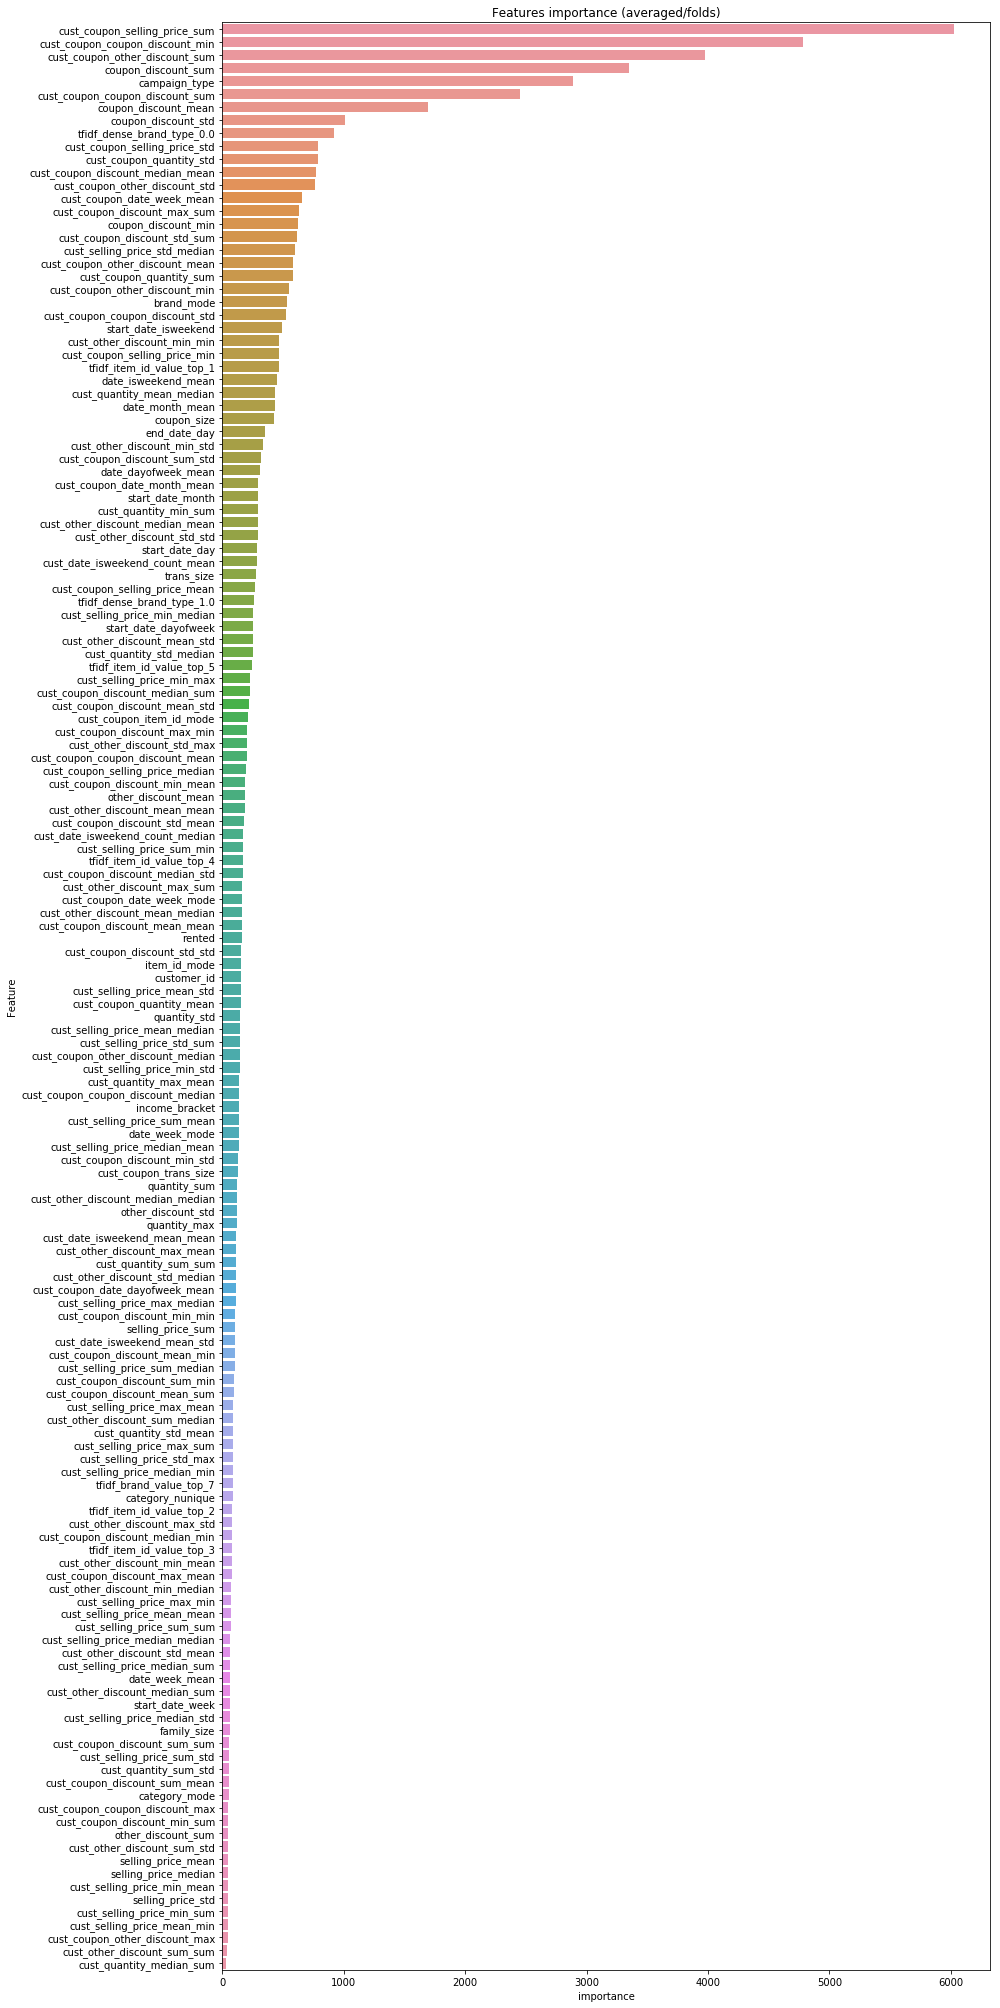

In [98]:
feature_importance_df_0= feature_importance_df[0]
cols = (feature_importance_df_0[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df_0.loc[feature_importance_df_0.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI-normal-0.png')

In [99]:
iterations_arr = np.array(iterations)
iterations_arr

array([ 22, 542,  24,  47,   1])

In [100]:
%%time
#run full train with average no of iterations
cur_iterations = int(np.mean(iterations_arr))
param['n_estimators'] = cur_iterations
print('cur_iterations:',cur_iterations)
model_full_train,predictions_mean,feature_importance_df_full = \
runfulltrain(train_full_enc, test_encs[0],target,train_full_features,param,
                  lgb_fit_full,lgb_predict_full)

cur_iterations: 127


/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Fit complete
Test Pred complete
CPU times: user 19.5 s, sys: 1.46 s, total: 21 s
Wall time: 6.6 s


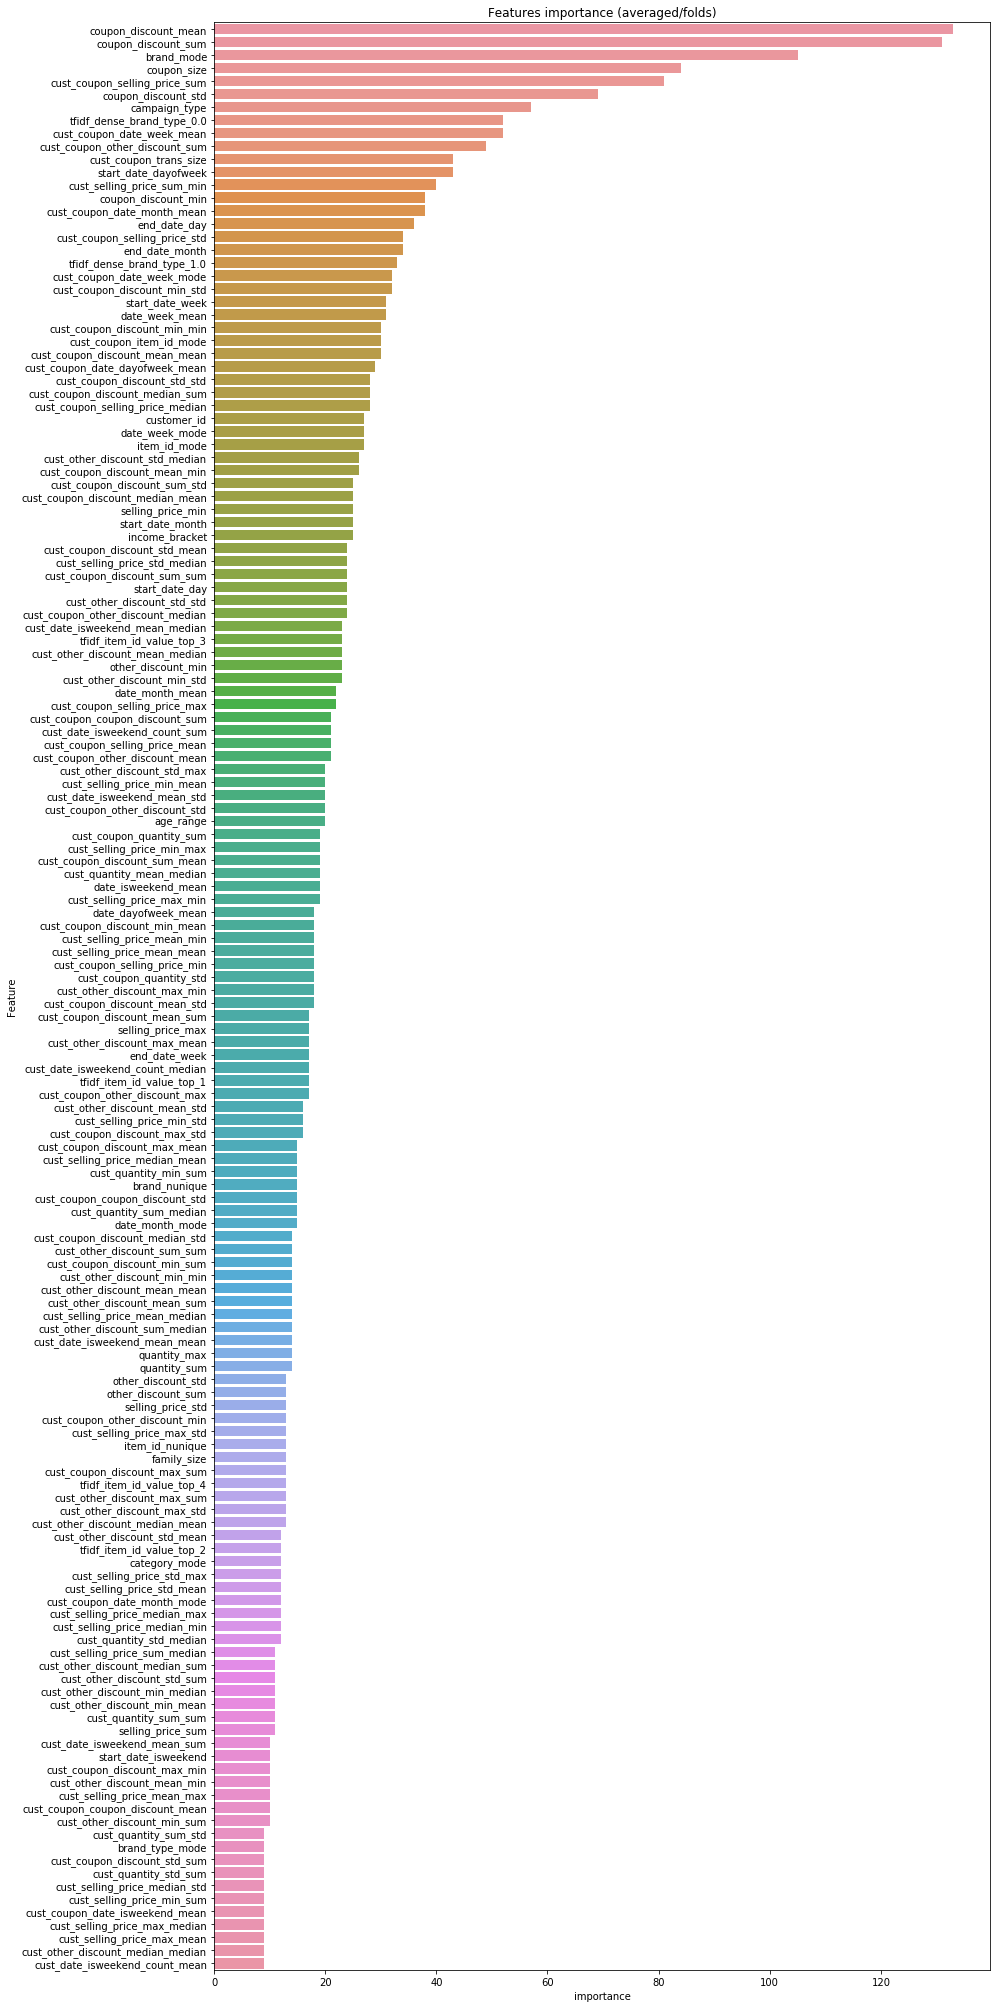

In [101]:
cols = (feature_importance_df_full[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df_full.loc[feature_importance_df_full.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI-fulltrain.png')

In [102]:
subm[targetcol] = predictions_mean
subm.to_csv('submission_fulltrain_mean.csv', index=False)
print(subm.head(10))

   id  redemption_status
0   3           0.285228
1   4           0.024122
2   5           0.018248
3   8           0.003134
4  10           0.003403
5  12           0.011072
6  13           0.005464
7  16           0.003134
8  18           0.007056
9  31           0.005476


In [103]:
%%time
#run full train with first fold iterations
cur_iterations = int(iterations_arr[0])
param['n_estimators'] = cur_iterations
print('cur_iterations:',cur_iterations)
model_full_train,predictions_min,feature_importance_df_full = \
runfulltrain(train_full_enc, test_encs[0],target,train_full_features,param,
                  lgb_fit_full,lgb_predict_full)

cur_iterations: 22
Fit complete
Test Pred complete
CPU times: user 8.48 s, sys: 1.12 s, total: 9.6 s
Wall time: 3.67 s


In [104]:
subm[targetcol] = predictions_min
subm.to_csv('submission_fulltrain_min.csv', index=False)
print(subm.head(10))

   id  redemption_status
0   3           0.089709
1   4           0.014821
2   5           0.007939
3   8           0.007676
4  10           0.007676
5  12           0.010644
6  13           0.007881
7  16           0.007676
8  18           0.009035
9  31           0.007881


In [105]:
%%time
#run full train with max no of iterations
cur_iterations = int(np.max(iterations_arr))
param['n_estimators'] = cur_iterations
print('cur_iterations:',cur_iterations)
model_full_train,predictions_max,feature_importance_df_full = \
runfulltrain(train_full_enc, test_encs[0],target,train_full_features,param,
                  lgb_fit_full,lgb_predict_full)

cur_iterations: 542
Fit complete
Test Pred complete
CPU times: user 1min 14s, sys: 2.09 s, total: 1min 16s
Wall time: 20.6 s


In [106]:
subm[targetcol] = predictions_max
subm.to_csv('submission_fulltrain_max.csv', index=False)
print(subm.head(10))

   id  redemption_status
0   3           0.344102
1   4           0.015471
2   5           0.059228
3   8           0.000184
4  10           0.000358
5  12           0.004910
6  13           0.002597
7  16           0.000227
8  18           0.007356
9  31           0.003121


In [107]:
#full train ens subm
predictions_full_train_iter_ens = (predictions_max + predictions_min + predictions_mean) / 3
subm[targetcol] = predictions_full_train_iter_ens
subm.to_csv('submission_fulltrain_ens.csv', index=False)
print(subm.head(10))

   id  redemption_status
0   3           0.239680
1   4           0.018138
2   5           0.028472
3   8           0.003665
4  10           0.003812
5  12           0.008875
6  13           0.005314
7  16           0.003679
8  18           0.007816
9  31           0.005493


In [108]:
#full train and normal ens subm
subm[targetcol] = (predictions_max + predictions_min + predictions_mean + predictions) / 4
subm.to_csv('submission_fulltrain_and_normal_ens.csv', index=False)
print(subm.head(10))

   id  redemption_status
0   3           0.233972
1   4           0.018101
2   5           0.024319
3   8           0.003793
4  10           0.003974
5  12           0.008170
6  13           0.005143
7  16           0.003802
8  18           0.008158
9  31           0.005502


In [109]:
#read h2o transformed data
Path = '../input/amex-2019/'
train_full_enc_h2o= pd.read_csv(Path+'train_0_full_enc_trx.csv')
test_full_enc_h2o= pd.read_csv(Path+'test_0_full_enc_trx.csv')

targetcol = 'redemption_status'

train_full_features = [col for col in train_full_enc_h2o.columns if targetcol not in col]
print(len(train_full_features))
print(train_full_features)

55
['0_age_range', '1_brand_mode', '10_coupon_discount_std', '102_tfidf_dense_category_15_0', '108_tfidf_dense_category_6_0', '11_coupon_discount_sum', '111_tfidf_dense_category_9_0', '112_tfidf_item_id_value_top_1', '114_tfidf_item_id_value_top_2', '123_ClusterDist4:brand_mode:brand_type_mode:campaign_type:coupon_discount_std:tfidf_brand_value_top_8.0', '123_ClusterDist4:brand_mode:brand_type_mode:campaign_type:coupon_discount_std:tfidf_brand_value_top_8.3', '125_TruncSVD:brand_type_mode:coupon_discount_sum:tfidf_dense_category_10_0.0', '125_TruncSVD:brand_type_mode:coupon_discount_sum:tfidf_dense_category_10_0.1', '126_ClusterDist4:cust_coupon_selling_price_sum:tfidf_brand_value_top_8.2', '126_ClusterDist4:cust_coupon_selling_price_sum:tfidf_brand_value_top_8.3', '127_NumToCatTE:coupon_discount_sum:cust_coupon_coupon_discount_sum.0', '128_ClusterDist9:category_nunique:cust_coupon_selling_price_sum.0', '128_ClusterDist9:category_nunique:cust_coupon_selling_price_sum.2', '128_ClusterDi

In [110]:
param['n_estimators'] = 94
model_full_train,predictions_h2o,feature_importance_df_full = \
runfulltrain(train_full_enc_h2o, test_full_enc_h2o,target,train_full_features,param,
                  lgb_fit_full,lgb_predict_full)

Fit complete
Test Pred complete


In [111]:
#read h2o transformed data

train_encs_comb = pd.concat([train_full_enc,train_full_enc_h2o.drop(targetcol,axis=1)],axis=1)
test_encs_comb = pd.concat([test_encs[0],test_full_enc_h2o],axis=1)

print(train_encs_comb.shape)
print(test_encs_comb.shape)
targetcol = 'redemption_status'

train_full_features = [col for col in train_encs_comb.columns if targetcol not in col]
print(len(train_full_features))
print(train_full_features)

(78357, 343)
(50226, 342)
342
['customer_id', 'campaign_type', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_dayofweek', 'start_date_isweekend', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_dayofweek', 'end_date_isweekend', 'end_date_week', 'coupon_size', 'brand_nunique', 'brand_mode', 'brand_type_nunique', 'brand_type_mode', 'category_nunique', 'category_mode', 'age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket', 'trans_size', 'item_id_nunique', 'item_id_mode', 'date_isweekend_mean', 'date_month_mean', 'date_month_mode', 'date_week_mean', 'date_week_mode', 'date_dayofweek_mean', 'date_dayofweek_mode', 'quantity_mean', 'quantity_sum', 'quantity_min', 'quantity_max', 'quantity_median', 'quantity_std', 'other_discount_mean', 'other_discount_sum', 'other_discount_min', 'other_discount_max', 'other_discount_median', 'other_discount_std', 'coupon_discount_mean', 'coupon_discount_sum', 'coupon_di

In [112]:
%%time
param['n_estimators'] = 24

#combined features
model_full_train,predictions_comb,feature_importance_df_full = \
runfulltrain(train_encs_comb, test_encs_comb,target,train_full_features,param,
                  lgb_fit_full,lgb_predict_full)

Fit complete
Test Pred complete
CPU times: user 11.2 s, sys: 1.81 s, total: 13 s
Wall time: 5.16 s


In [113]:
#ensemble of full train normal, full train h2o and full train combined
#ensemble
w1= 1; w2=0.1; w3=1
predictions_blend = w1*predictions_full_train_iter_ens + w2*predictions_h2o + w3*predictions_comb

subm[targetcol] = predictions_blend
subm.to_csv('submission_fulltrain_tool_blend.csv', index=False)
print(subm.head(10))

   id  redemption_status
0   3           0.482467
1   4           0.030880
2   5           0.037747
3   8           0.011519
4  10           0.011666
5  12           0.018796
6  13           0.014043
7  16           0.011533
8  18           0.017181
9  31           0.014255


In [114]:
# %%time
# models,predictions,oof,feature_importance_df = \
#         runmodel(train[features],test[features],target,param,features,lgb_fit,lgb_predict)

In [115]:
#save fold level train, test and val
#Date Validation split
import datetime

def save_fold_encs(tr_encs,val_encs,test_encs,n_splits):
    
    tr_all = pd.DataFrame()
    val_all = pd.DataFrame()
    test_all = pd.DataFrame()
    for fold_ in range(n_splits):
        print('fold:',fold_)
        tr =tr_encs[fold_]
        val =val_encs[fold_]
        test_cur =test_encs[fold_]
        
        tr['fold'] = fold_; val['fold'] = fold_; test_cur['fold'] = fold_
        
        print('save individual fold data files')
        tr.to_csv('tr_'+str(fold_)+'.csv',index=False)
        val.to_csv('val_'+str(fold_)+'.csv',index=False)
        test_cur.to_csv('test_'+str(fold_)+'.csv',index=False)
   
        print('concat data ')
        tr_all = pd.concat([tr_all,tr],axis=0)
        val_all = pd.concat([val_all,val],axis=0)
        test_all = pd.concat([test_all,test_cur],axis=0)
        
#         print(tr_all.head())

    print('save all data files')
    tr_all.to_csv('tr_all.csv',index=False)
    val_all.to_csv('val_all.csv',index=False)
    test_all.to_csv('test_all.csv',index=False)
    
    return tr_all,val_all,test_all


In [116]:
#save normal encs
tr_all,val_all,test_all = save_fold_encs(tr_encs,val_encs,test_encs,n_splits)

fold: 0
save individual fold data files
concat data 
fold: 1
save individual fold data files
concat data 


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



fold: 2
save individual fold data files
concat data 
fold: 3
save individual fold data files
concat data 
fold: 4
save individual fold data files
concat data 
save all data files


In [117]:
#save full train encs
train_full_enc.to_csv('train_full_enc.csv',index=False)